Esta imagen es de tipo:  <class 'numpy.ndarray'> con dimensiones:  (256, 256)


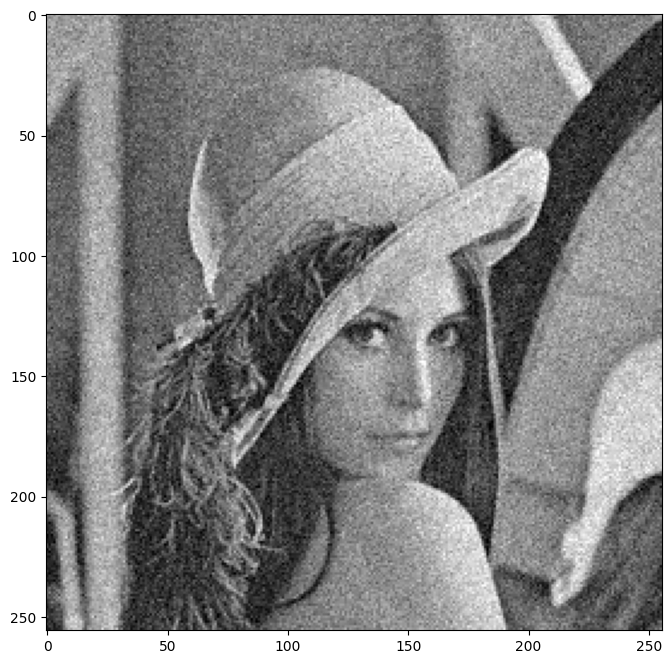

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy.stats import multivariate_normal
%matplotlib inline

# Leer la imagen con ruido de sal y pimienta
lenna_sp = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Scripts/Recursos/lena_ruido.jpg")
# Leer imagen con ruido gaussiano
lenna_rg = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Scripts/Recursos/lena_rg.jpg")

# Desplegar información y graficar la imagen
print("Esta imagen es de tipo: ", type(lenna_rg), "con dimensiones: ", lenna_rg.shape)

plt.figure(figsize=(8,8))
plt.imshow(lenna_rg, cmap = "gray")


[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


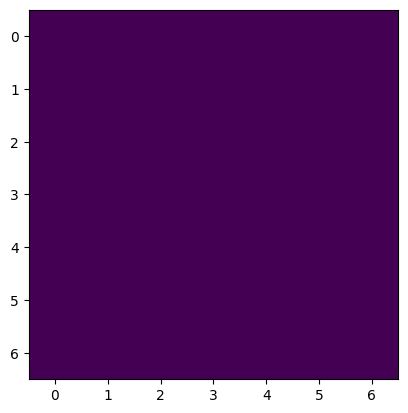

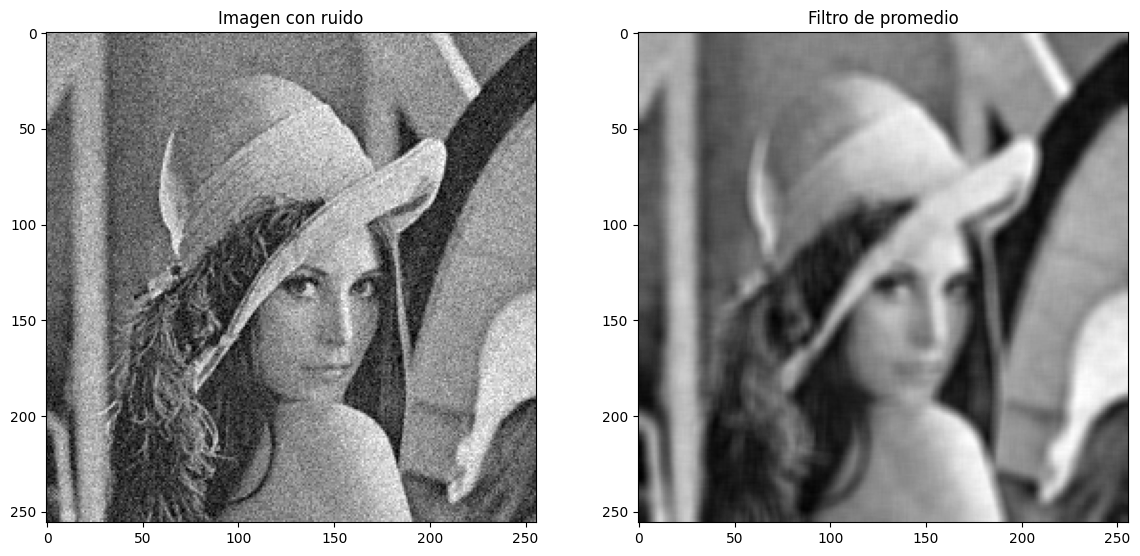

In [3]:
# Definir kernel (filtro)
k = 3
tama = 2 * k + 1
# Resolver
kernel = np.ones((tama,tama),np.float32) / (tama**2)

print(kernel)
# Imprimir el filtro
plt.imshow(kernel)

# Resolver
# Operación de convolución 2D entre el filtro y la imagen
# Se utiliza la función filter 2D de OpenCV
imagen_filtrada = cv2.filter2D(lenna_rg,-1,kernel)

plt.figure(figsize=(14,14))

plt.subplot(221)
plt.imshow(lenna_rg, cmap = "gray")
plt.title("Imagen con ruido")

plt.subplot(222)
plt.imshow(imagen_filtrada, cmap = "gray")
plt.title("Filtro de promedio")

plt.show()

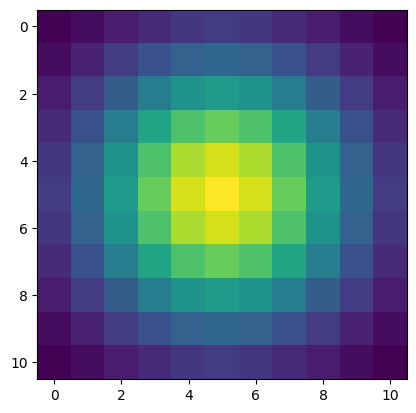

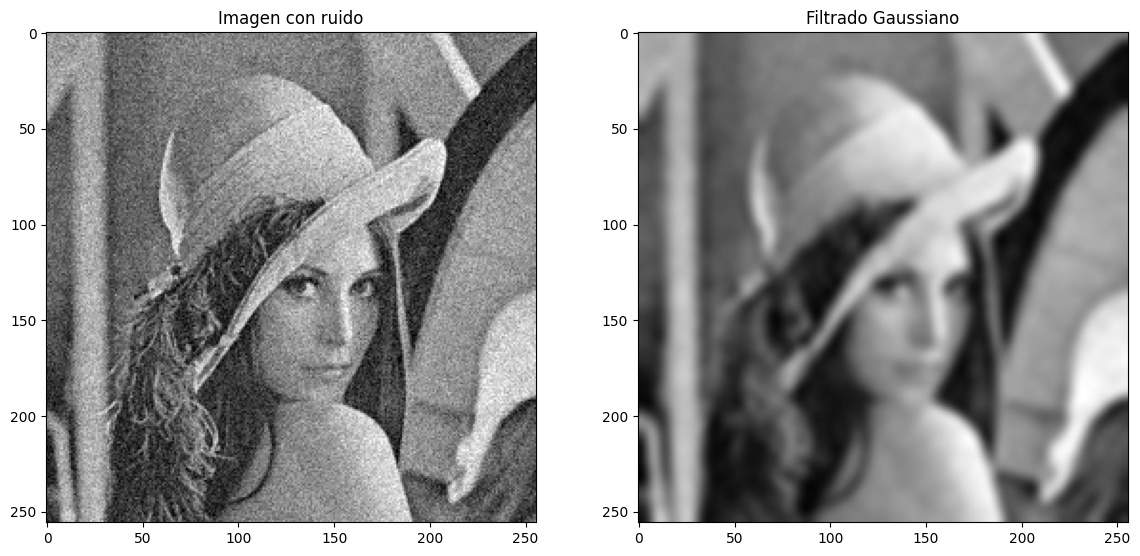

In [4]:
k = 5
tama = 2 * k + 1

# Definir los parámetros de la función gaussiana
mean = [0, 0]
cov = [[8,0],[0,8]]

# Se rellena el kernel
kernel_gaussiano = np.zeros((tama,tama), np.float32)

for i in range(tama):
    for j in range(tama):
        x = [-k + i, -k + j]
        w = multivariate_normal.pdf(x, mean, cov)
        kernel_gaussiano[i,j] = w

# Se imprime el kernel
plt.imshow(kernel_gaussiano)

# Operación de convolución 2D entre el kernel que genermaos y la imagen objetivo
img_difuminada = cv2.filter2D(lenna_rg, -1, kernel_gaussiano)

plt.figure(figsize=(14,14))

plt.subplot(221)
plt.imshow(lenna_rg, cmap = "gray")
plt.title("Imagen con ruido")

plt.subplot(222)
plt.imshow(img_difuminada, cmap = "gray")
plt.title("Filtrado Gaussiano")

plt.show()

[[158 157 156 ... 133 135 138]
 [159 158 157 ... 128 129 131]
 [157 156 155 ... 118 117 118]
 ...
 [ 49  51  52 ...  75  76  76]
 [ 46  50  50 ...  78  81  82]
 [ 46  49  50 ...  81  83  84]]


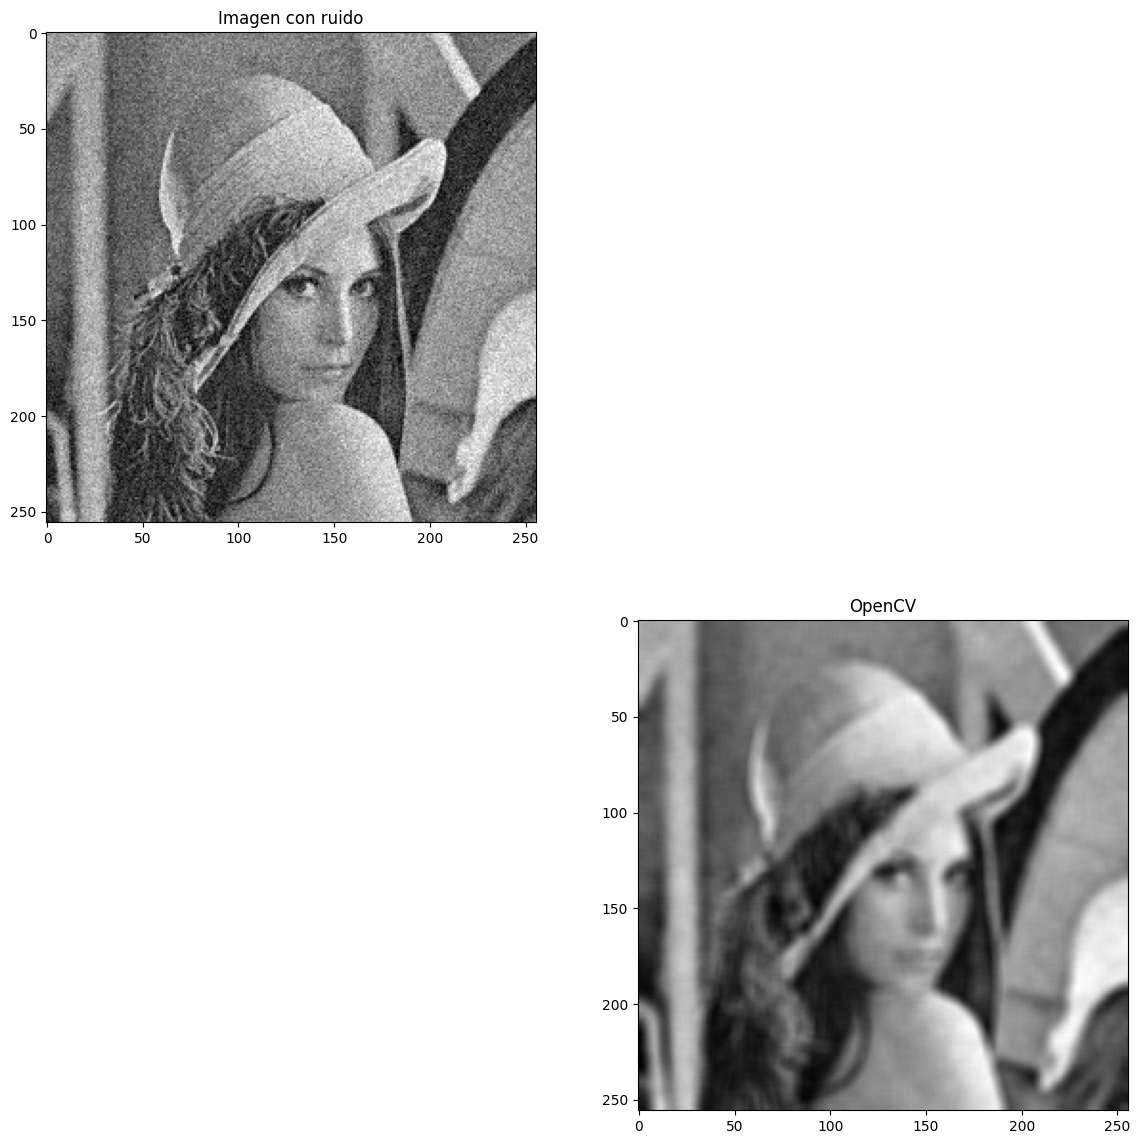

In [5]:
# Se utiliza el comando implementado de OpenCV

lenna_rg = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Scripts/Recursos/lena_rg.jpg")

sigma = 5
size = 7
blur = cv2.GaussianBlur(lenna_rg, (size, size), sigma)

print(blur)

plt.figure(figsize=(14, 14))

plt.subplot(221)
plt.imshow(lenna_rg, cmap = "gray")
plt.title("Imagen con ruido")

plt.subplot(224)
plt.imshow(blur, cmap='gray')
plt.title("OpenCV")

plt.show()

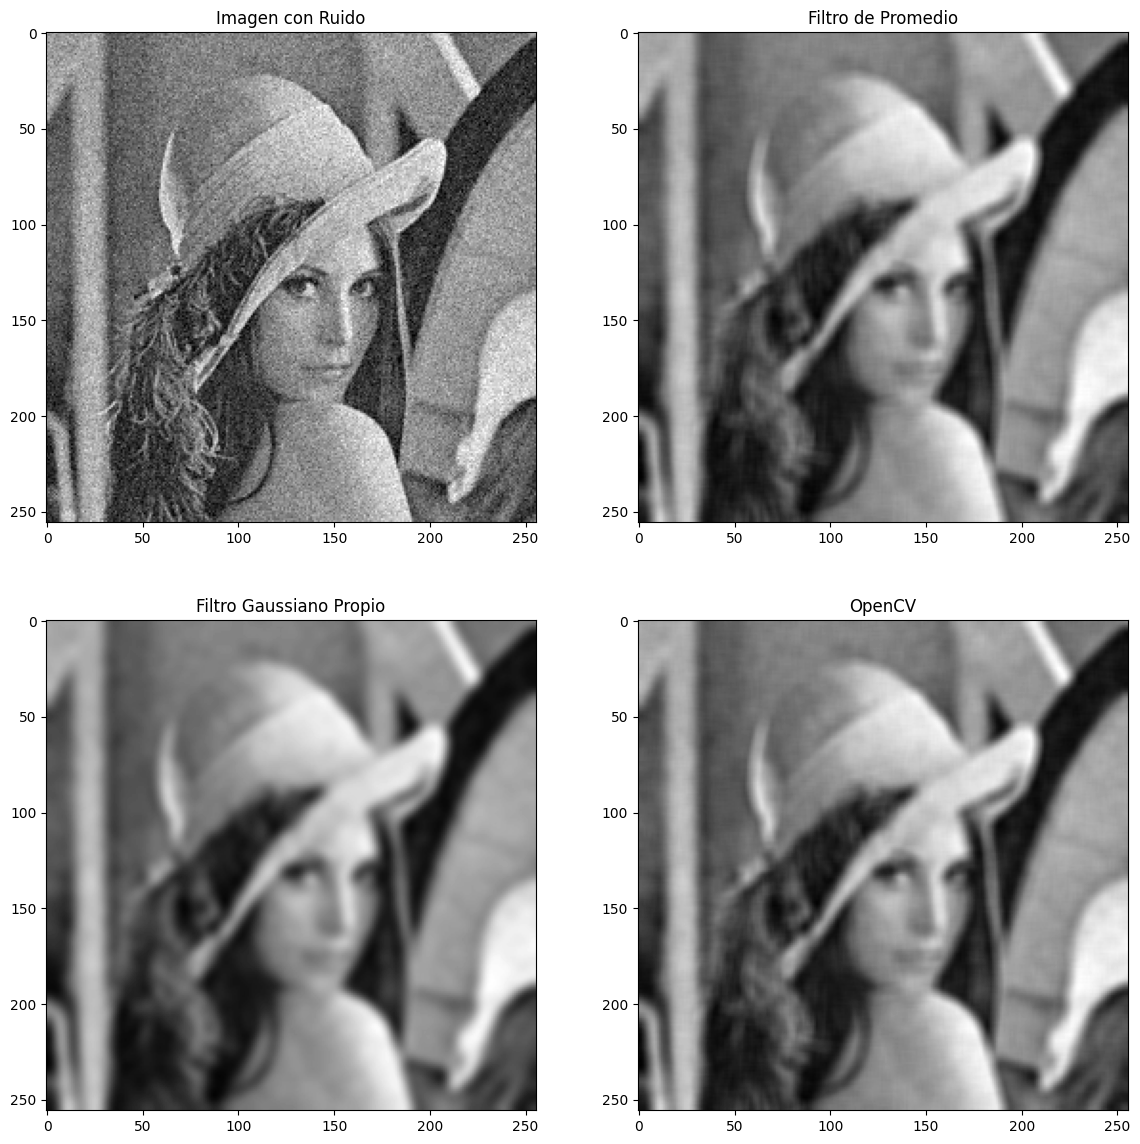

In [23]:
plt.figure(figsize=(14, 14))

plt.subplot(221)
plt.imshow(lenna_rg, cmap='gray')
plt.title("Imagen con Ruido")

plt.subplot(222)
plt.imshow(imagen_filtrada, cmap='gray')
plt.title("Filtro de Promedio")

plt.subplot(223)
plt.imshow(img_difuminada, cmap='gray')
plt.title("Filtro Gaussiano Propio")

plt.subplot(224)
plt.imshow(blur, cmap='gray')
plt.title("OpenCV")

plt.show()
